In [1]:
# coding: utf8

# Calcul des Coformes pour le lexique complet

In [2]:
# -*- coding: utf8 -*-
import pandas as pd
import pickle, glob
import itertools as it
import networkx as nx
import random as rd
import numpy as np
import matplotlib,math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets

In [3]:
repHDR="/Users/gilles/ownCloud/Recherche/Boye/HDR/Memoire/figs/"

# Gestion des espaces thématiques

In [4]:
etCells=[
    ["pi1P","pi2P"]+["ii"+p+n for p in "123" for n in "SP"],
    ["pi3P"],
    ["pi"+p+"S" for p in "123"],
    ["pP"],
    ["pI2S"],
    ["pI1P","pI2P"],
    ["ps"+p+"S" for p in "123"]+["ps3P"],
    ["ps1P","ps2P"],
    ["inf"],
    ["fi"+p+n for p in "123" for n in "SP"]+["pc"+p+n for p in "123" for n in "SP"],
    ["ai"+p+n for p in "123" for n in "SP"]+["is"+p+n for p in "123" for n in "SP"],
    ["pp"+g+n for g in "MF" for n in "SP"],
        ]

latex2RGB={"orange":(240,134,51),
           "brown!50":(218,192,163),
           "brown":(182,130,75),
           "blue!10":(230,230,253),
           "yellow!50":(255,246,164),
           "blue!25":(191,192,250),
           "teal!50":(141,190,190),
           "blue!50":(128,129,247),
           "cyan!50":(133,198,227),
           "lime":(204,252,81),
           "pink":(246,194,193),
           "magenta!50":(221,151,180),
          }
etRGB=[
        (240,134,51),
        (218,192,163),
        (182,130,75),
        (230,230,253),
        (255,246,164),
        (191,192,250),
        (141,190,190),
        (128,129,247),
        (133,198,227),
        (204,252,81),
        (246,194,193),
        (221,151,180),
       ]
etRGBx=[(r/255.,g/255.,b/255.) for r,g,b in etRGB]

cellColors={}
for nEt,et in enumerate(etCells):
    for c in et:
        cellColors[c]=etRGBx[nEt]

personnes=[p+n for n in "SP" for p in "123" ]
cases=[t+p for t in "pi ii fi pc ps ai is".split(" ") for p in personnes]
cases+="pI2S pI1P pI2P inf pP".split(" ")
cases+=["pp"+g+n for g in "MF" for n in "SP"]
#cases

In [5]:
def colorerXTicks(gAX):
    xlabels=gAX.get_xticklabels()
    for xlabel in xlabels:
        xtext=xlabel.get_text()
        xlabel.set_backgroundcolor(cellColors[xtext])
        xlabel.set_family("monospace")


In [6]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [7]:
%matplotlib inline
#from __future__ import unicode_literals

In [8]:
lexiquePrefix="MGC-171229"

# Défectifs de Boyé(2000)

In [9]:
boyeDefectifs=[u"abstraire", u"accroire", u"adirer", u"advenir", u"apparoir", u"assavoir", u"avenir",
               u"becter", u"béer", u"bienvenir", u"braire", u"bruire", u"chaloir", u"choir", u"clore", 
               u"comparoir", u"contrefoutre", u"courre", u"déchoir", u"déclore", u"dépourvoir", 
               u"discontinuer", u"dissoudre", u"distraire", u"douer", u"échoir", u"éclore", u"enclore", 
               u"endêver", u"ensuivre", u"ester", u"extraire", u"faillir", u"férir", u"forclore", 
               u"forfaire", u"foutre", u"frire", u"gésir", u"huir", u"impartir", u"issir", u"malfaire", 
               u"méfaire", u"messeoir", u"moufeter", u"moufter", u"mourir", u"oindre", u"ouïr", u"paître", 
               u"parfaire", u"poindre", u"quérir", u"raire", u"rassir", u"ravoir", u"reclure", u"revaloir", 
               u"saillir", u"seoir", u"sourdre", u"soustraire", u"stupéfaire", u"surfaire", u"titre", 
               u"traire", u"urger"]


# Lecture de Verbes3
Verbes3 contient les fréquences et les probabilités calculées pour répartir les fréquences brutes de Lexique3 entre les formes homographes.

In [10]:
lexique=pd.read_pickle("/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/"+lexiquePrefix+'-Verbes3.pkl')

## Calcul du nombre de cases à remplir par lexème

In [11]:
nbCases=lexique.groupby(by=["lexeme","case"],as_index=False)["phono"].count()
nbFormes=nbCases.groupby(by=["lexeme"],as_index=True)[["case"]].count()
if len(nbFormes.columns)==2:
    nbFormes.columns=["lexeme","nbFormes"]
else:
    nbFormes.columns=["nbFormes"]

In [12]:
dictNbFormes=nbFormes.to_dict()["nbFormes"]
dictNbFormes

{u'anordir': 48,
 u'\xe9ditionner': 51,
 u'gauchir': 51,
 u'd\xe9nazifier': 51,
 u'r\xe9installer': 51,
 u'caner': 51,
 u'tancer': 51,
 u'devenir': 51,
 u'orthographier': 51,
 u'superposer': 51,
 u'affectionner': 51,
 u'verser': 51,
 u'muloter': 48,
 u'd\xe9gommer': 51,
 u'accouer': 51,
 u'd\xe9verser': 51,
 u'pleuvoter': 17,
 u'spiritualiser': 51,
 u'empoissonner': 51,
 u'persister': 48,
 u'd\xe9ganter': 51,
 u'juda\xefser': 51,
 u'commenter': 51,
 u'concasser': 51,
 u'bossuer': 51,
 u'\xe9peurer': 51,
 u'maquereauter': 51,
 u'boursicoter': 48,
 u'aposter': 51,
 u'chauffer': 51,
 u'poiler': 51,
 u'miniaturer': 51,
 u'd\xe9payser': 51,
 u'pencher': 51,
 u'poivrer': 51,
 u'\xe9vider': 51,
 u'foisonner': 48,
 u'pr\xe9luder': 48,
 u'moucharder': 51,
 u'muer': 51,
 u'revouloir': 51,
 u'd\xe9l\xe9aturer': 51,
 u'effaroucher': 51,
 u'd\xe9sulfurer': 51,
 u'd\xe9valoriser': 51,
 u'grossir': 51,
 u'fusionner': 51,
 u'confisquer': 51,
 u'reporter': 51,
 u'susurrer': 51,
 u'd\xe9sincruster': 51,

# Distribution des fréquences et Zipf

## Distribution par lexème, par forme

In [13]:
freqLexemes=lexique.groupby(by="lexeme",as_index=False)["freq"].sum().sort_values(by="freq",ascending=False)
freqLexemes.reset_index(inplace=True)
freqFormes=lexique.groupby(by=["lexeme","case"],as_index=False).agg({"phono":" ".join, "freq":sum}).sort_values(by="freq",ascending=False)
freqFormes.reset_index(inplace=True)
freqFormes["id"]=freqFormes["lexeme"]+u" — "+freqFormes["case"]

## Distribution par case
récupérer le dictionnaire de couleurs des autres scripts pour les graphes avec les noms de cases

In [14]:
freqCases=lexique.groupby(by="case",as_index=False)["freq"].sum().sort_values(by="freq",ascending=False)
freqCases.reset_index(inplace=True)
zipf=freqCases["freq"].max()
freqCases["zipf"]=zipf/(freqCases.index+1)

#freqCases

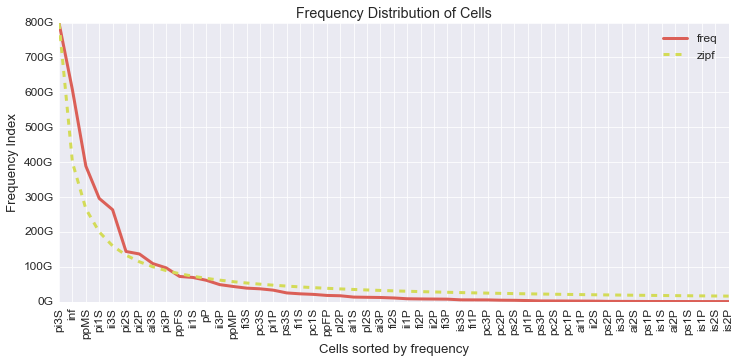

In [15]:
ax=freqCases[["freq","zipf"]].plot(kind="line",style=['-', '--'],
                                   figsize=(12, 5),
                                   rot=90,
                                   linewidth=3,
                                   xticks=range(51),
#                                   xlim=[-1,51]
                                  )
ax.set_xticklabels(freqCases["case"])
#plt.grid()
yticks=ax.get_yticks()
yticks=["%dG"%(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
#ax.set(yscale="log")
#colorerXTicks(ax)
plt.xlabel('Cells sorted by frequency')
plt.ylabel('Frequency Index')
plt.title('Frequency Distribution of Cells')
plt.show()

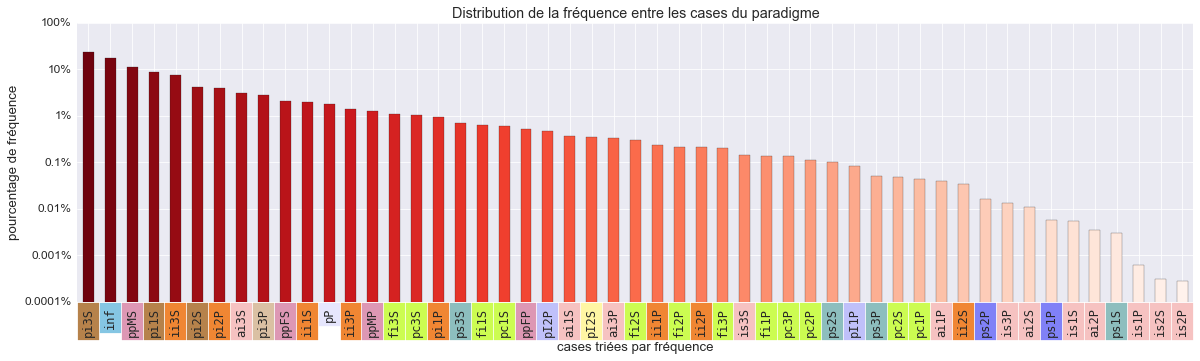

82295.4633986


,case,prop
0,pi3S,23.122683
1,inf,17.577510
2,ppMS,11.255055
3,pi1S,8.565403
4,ii3S,7.626844
5,pi2S,4.159705
6,pi2P,3.952208
7,ai3S,3.153858
8,pi3P,2.798527
9,ppFS,2.085418


In [16]:
freqSomme=freqCases["freq"].sum()
freqCases["prop"]=freqCases["freq"]/freqSomme*100
ax=freqCases["prop"].plot(kind="bar",figsize=(20, 5),
                          rot=90,xticks=range(51),
                          color=sns.color_palette("Reds_r",n_colors=51)
                         )
ax.set_xticklabels(freqCases["case"])
#plt.grid()
#plt.xlabel('Cells sorted by frequency')
ax.set(ylabel=u"pourcentage de fréquence",xlabel=u"cases triées par fréquence",yscale="log")
yticks=ax.get_yticks()
yticks=["%.3g%%"%y for y in yticks]
ax.set_yticklabels(yticks)
colorerXTicks(ax)
plt.title(u'Distribution de la fréquence entre les cases du paradigme')
plt.show()
print freqCases.iloc[0]["prop"]/freqCases.iloc[50]["prop"]
freqCases[["case","prop"]]

In [17]:
sFreqCases=freqCases.set_index("case").T[cases].T

In [18]:
sFreqCases=freqCases.sort_values(by="case")
sFreqCases=freqCases.set_index("case").T[cases].T
sFreqCasesSum=sFreqCases["freq"].sum()
sFreqCases["percent"]=sFreqCases["freq"]/sFreqCasesSum
sFreqCases.reset_index(inplace=True)

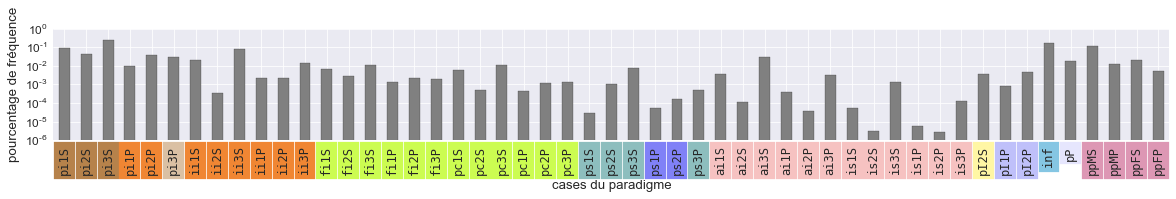

In [19]:
ax=sFreqCases["percent"].plot(kind="bar",
                              figsize=(20, 2),
                              color="grey",
                             )
ax.set_xticklabels(sFreqCases["case"])
colorerXTicks(ax)
#ax.set_ylim([0,0.25])
ax.set(ylabel=u"pourcentage de fréquence",xlabel=u"cases du paradigme",yscale="log")
#plt.grid()
plt.show()

### Evolution de la fréquence du passé simple 3 en fonction du rang

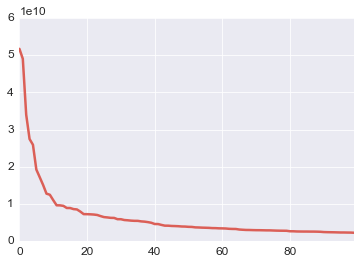

In [21]:
ai3S=lexique[lexique["case"]=="ai3S"].sort_values(by="freq",ascending=False).reset_index()
ax=ai3S["freq"][:100].plot()
plt.show()

# Évaluation de la distribution de fréquence comme indice de défectivité
- avec la fréquence brute FS
- avec la fréquence relative FSN
- avec le log de la fréquence brute FL
- avec le log de la fréquence brute moyenné FLN

### Ajout d'une colonne freqLog

In [24]:
lexique["freqLog"]=np.log(lexique["freq"])

## Distribution des cases par lexème

In [25]:
def lexique2Paradigmes(lexique,values="freq"):
    return pd.pivot_table(lexique, values=values, index=['lexeme'], columns=['case'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [26]:
colFreq="freq"
paradigmeFS=lexique2Paradigmes(lexique,"freq")
paradigmeFL=lexique2Paradigmes(lexique,"freqLog")

## Ajout d'une colonne fréquence de lexème

In [27]:
paradigmeFS["freqLexeme"]=paradigmeFS[cases].sum(axis=1,numeric_only=True)
paradigmeFL["freqLexeme"]=paradigmeFL[cases].sum(axis=1,numeric_only=True)

## Normalisation des fréquences de formes par rapport à la fréquence de lexèmes
on obtient des proportions entre les formes

In [66]:
paradigmeFSN=paradigmeFS.copy()
paradigmeFLN=paradigmeFL.copy()
for case in cases:
    paradigmeFSN[case]=(paradigmeFSN[case]/paradigmeFSN["freqLexeme"])
    paradigmeFLN[case]=(paradigmeFLN[case]/paradigmeFLN["freqLexeme"])

### Index des verbes défectifs et standard

In [28]:
ixDefectif=paradigmeFS[paradigmeFS.lexeme.isin(boyeDefectifs)].lexeme.to_dict()
defectifIx={v:k for k,v in ixDefectif.iteritems()}
ixDefectif,defectifIx

({36: u'abstraire',
  70: u'accroire',
  106: u'adirer',
  126: u'advenir',
  395: u'assavoir',
  565: u'becter',
  579: u'bienvenir',
  691: u'braire',
  740: u'bruire',
  770: u'b\xe9er',
  924: u'chaloir',
  990: u'choir',
  1060: u'clore',
  1117: u'comparoir',
  1246: u'contrefoutre',
  1316: u'courre',
  1485: u'discontinuer',
  1510: u'dissoudre',
  1520: u'distraire',
  1551: u'douer',
  1694: u'd\xe9choir',
  1712: u'd\xe9clore',
  2076: u'd\xe9pourvoir',
  2500: u'enclore',
  2533: u'end\xeaver',
  2642: u'ensuivre',
  2757: u'ester',
  2831: u'extraire',
  2850: u'faillir',
  2971: u'forclore',
  2973: u'forfaire',
  3005: u'foutre',
  3032: u'frire',
  3070: u'f\xe9rir',
  3250: u'g\xe9sir',
  3370: u'impartir',
  3715: u'malfaire',
  3817: u'messeoir',
  3902: u'moufeter',
  3903: u'moufter',
  3908: u'mourir',
  3955: u'm\xe9faire',
  4069: u'oindre',
  4116: u'ou\xefr',
  4182: u'parfaire',
  4230: u'pa\xeetre',
  4371: u'poindre',
  4607: u'qu\xe9rir',
  4667: u'raire',

In [29]:
ixVerbes=paradigmeFS.lexeme.to_dict()
lexemeLabels=ixVerbes.values()

# Plotter les distributions des défectifs par famille
- clore, déclore, éclore, enclore, forclore

In [61]:
def plotFamille(famille,gParadigme,ylim=None,width=1,yscale="linear",lPalette="Greys"):
    dfAX=(gParadigme[gParadigme["lexeme"].isin(famille)].set_index("lexeme").loc[famille][cases].T)
    ax=dfAX.plot(kind="bar",
                 figsize=(30,5),
                 width=width,
                 color=["r"]+sns.color_palette(lPalette,n_colors=len(dfAX)-1),
                )
    colorerXTicks(ax)
    ax.set(yscale=yscale,ylabel=u"occurrences par million de mots")
    ax.legend(loc="upper left")
    if ylim:
        ax.set_ylim([0,ylim])
    jointFamille="".join([l.capitalize() for l in famille])
    if yscale=="linear":
        strScale=""
    else:
        strScale=yscale.capitalize()+"-"
    plt.savefig(repHDR+u'Lex3-BP-%s%s-Verbes.pdf'%(strScale,jointFamille), dpi=300, bbox_inches="tight")
    plt.show()

### CLORE

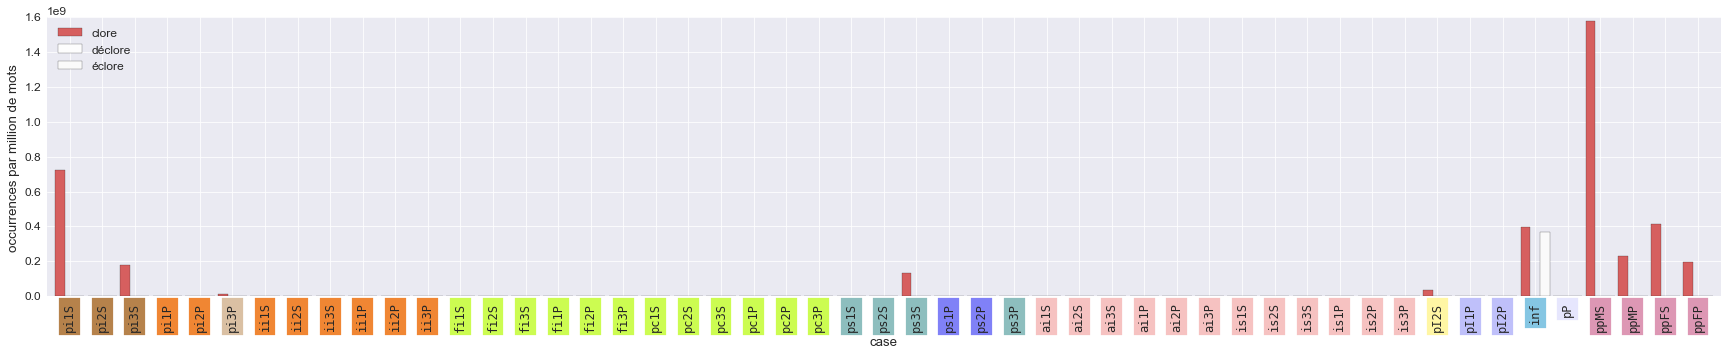

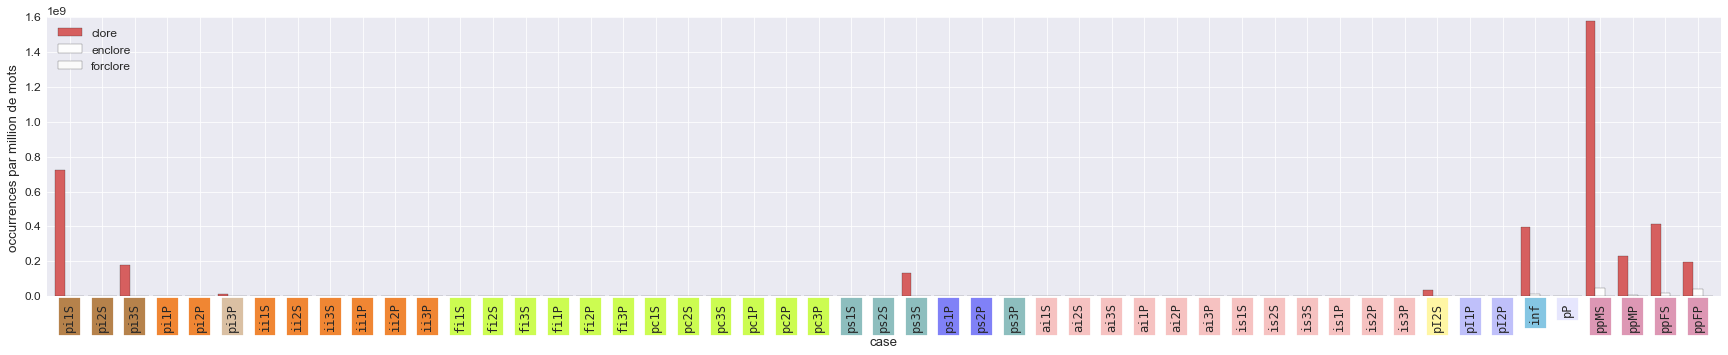

In [31]:
famille=u"clore, déclore, éclore".split(", ")
plotFamille(famille,paradigmeFS,width=.9,
#            ylim=1.E13,
           )
famille=u"clore, enclore, forclore".split(", ")
plotFamille(famille,paradigmeFS,width=.9,
#            ylim=1.E13,
           )

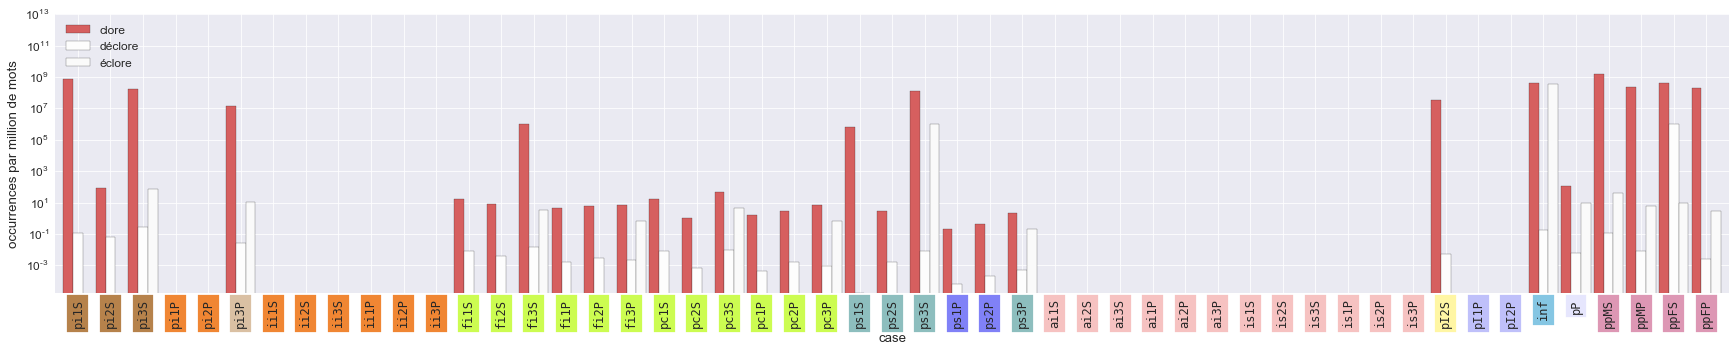

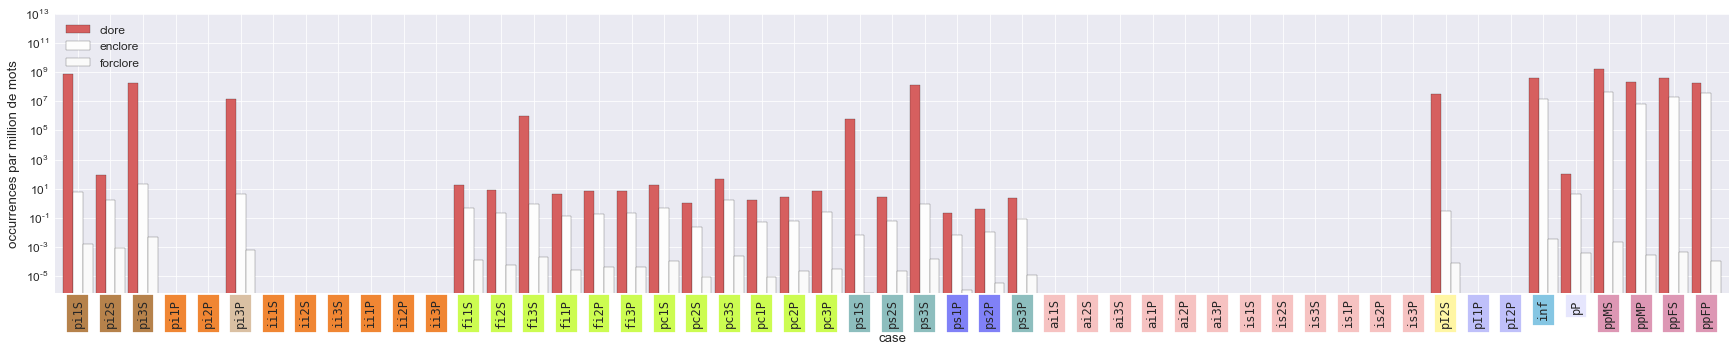

In [32]:
famille=u"clore, déclore, éclore".split(", ")
plotFamille(famille,paradigmeFS,width=.9,
            ylim=1.E13,yscale="log",
           )
famille=u"clore, enclore, forclore".split(", ")
plotFamille(famille,paradigmeFS,width=.9,
            ylim=1.E13,yscale="log",
           )

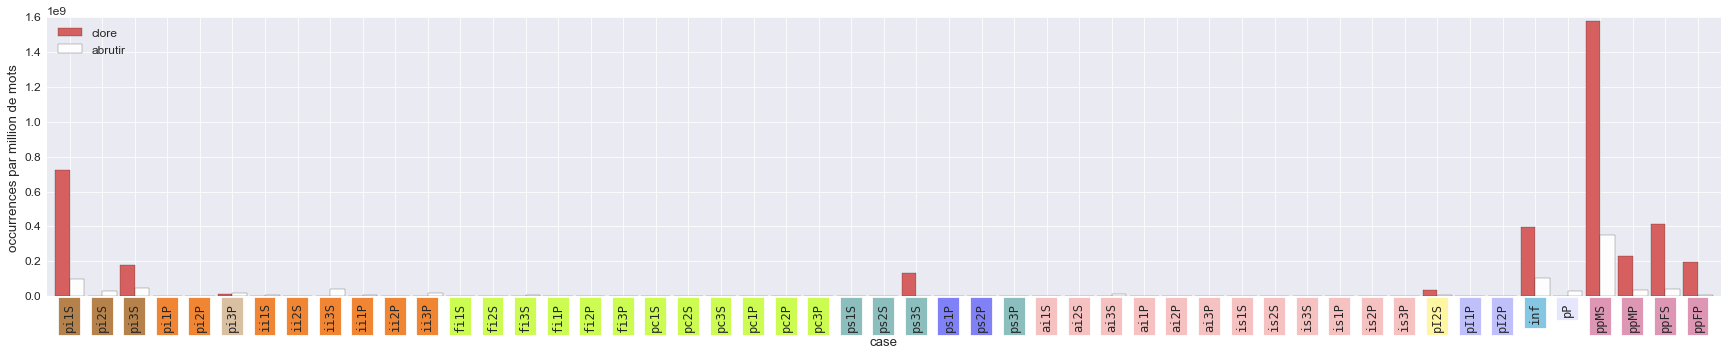

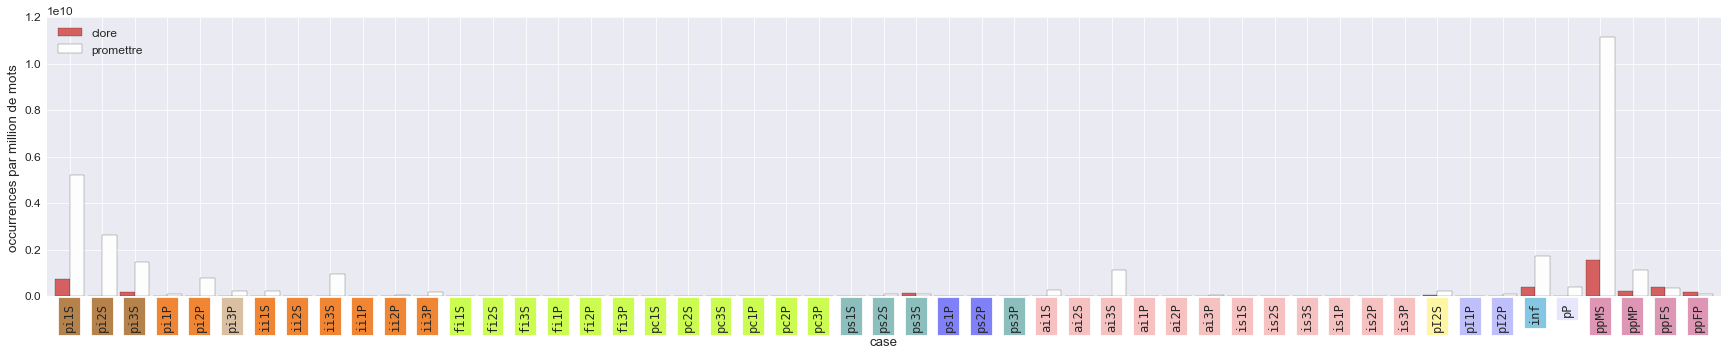

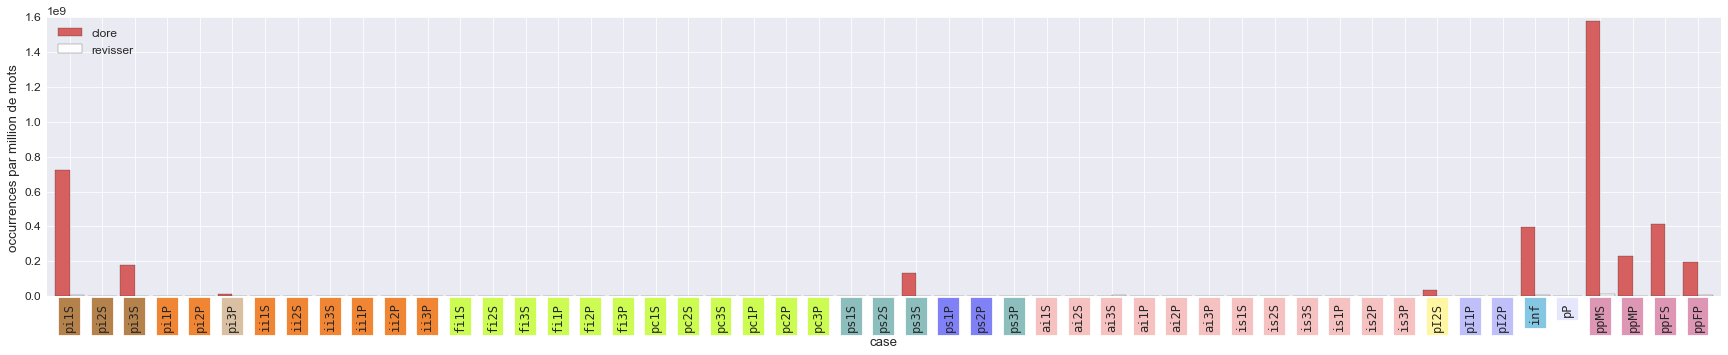

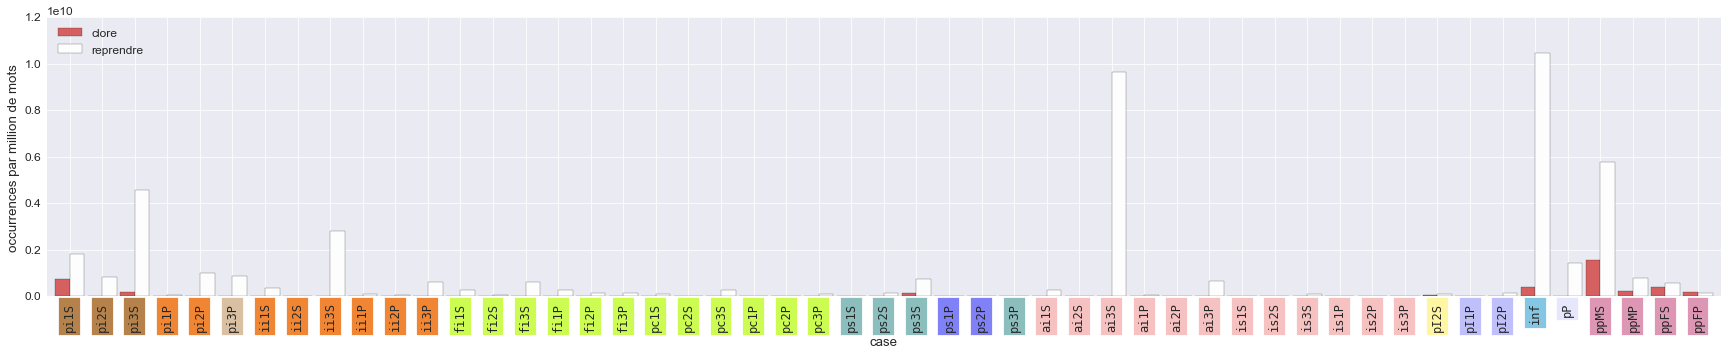

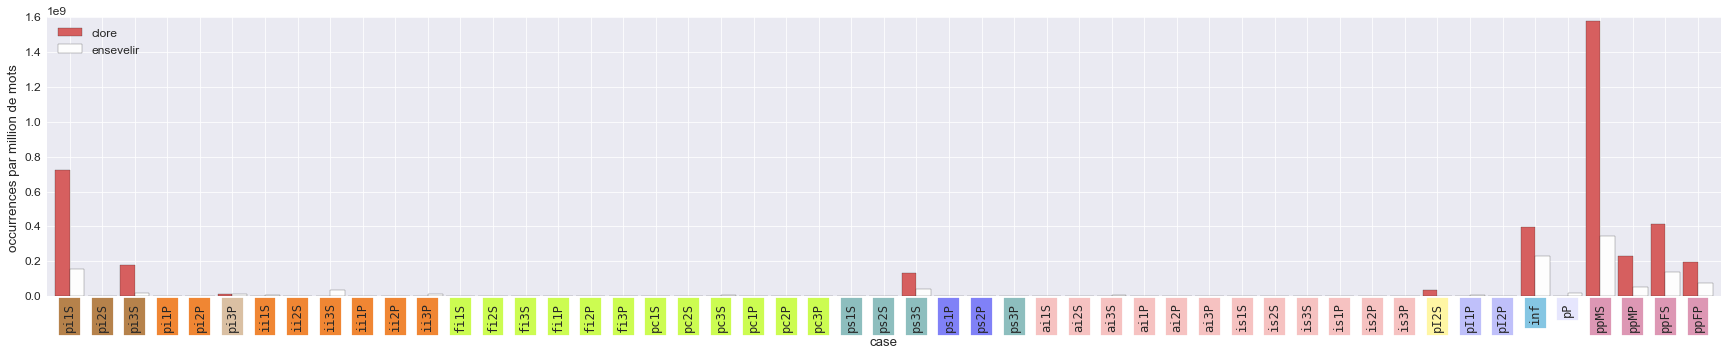

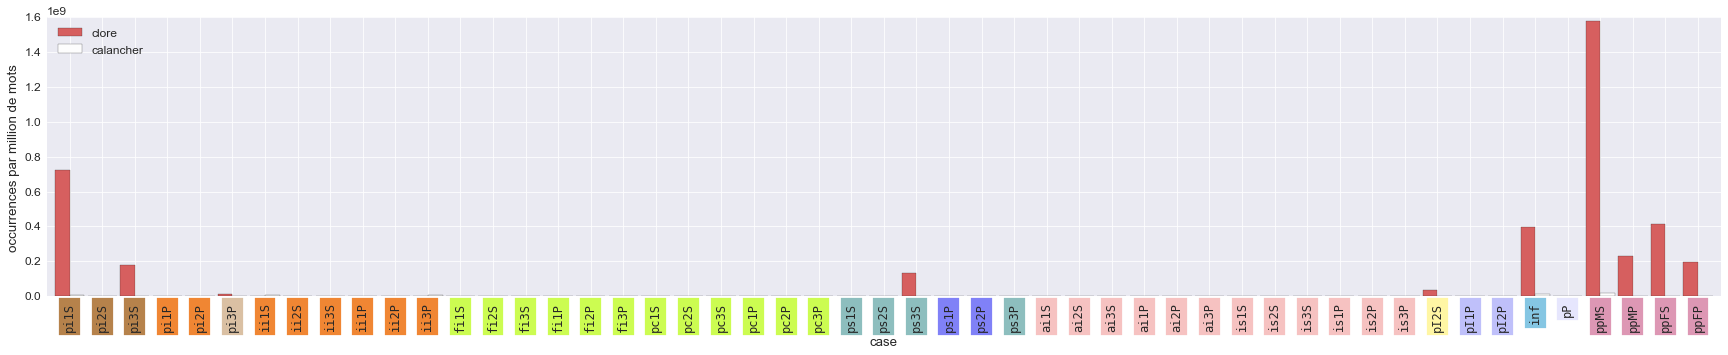

In [33]:
voisins=u"abrutir promettre revisser reprendre ensevelir calancher".split(" ")
for voisin in voisins:
    plotFamille([u"clore",voisin],paradigmeFS,
                width=.9,
               )

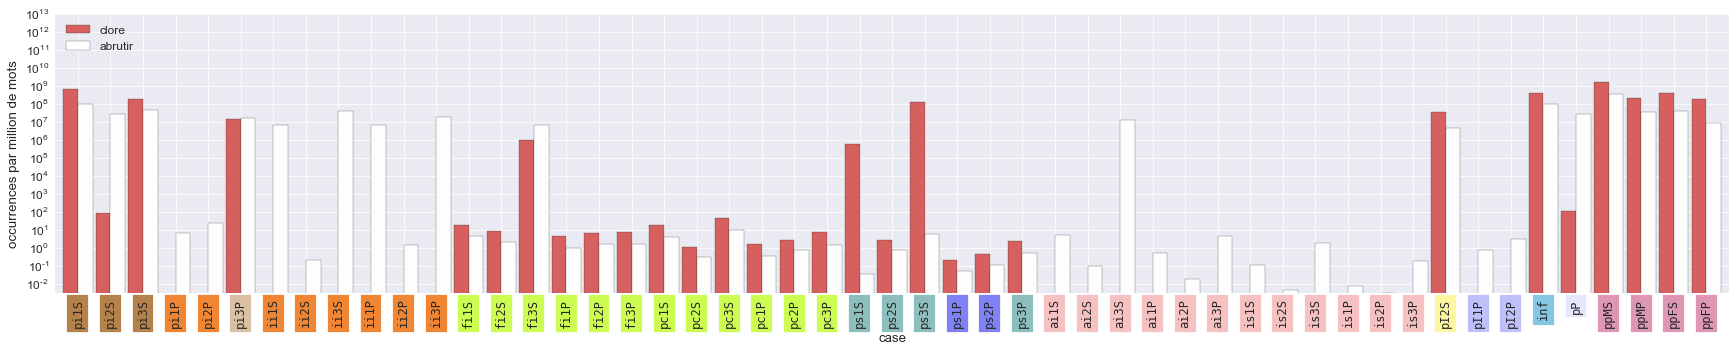

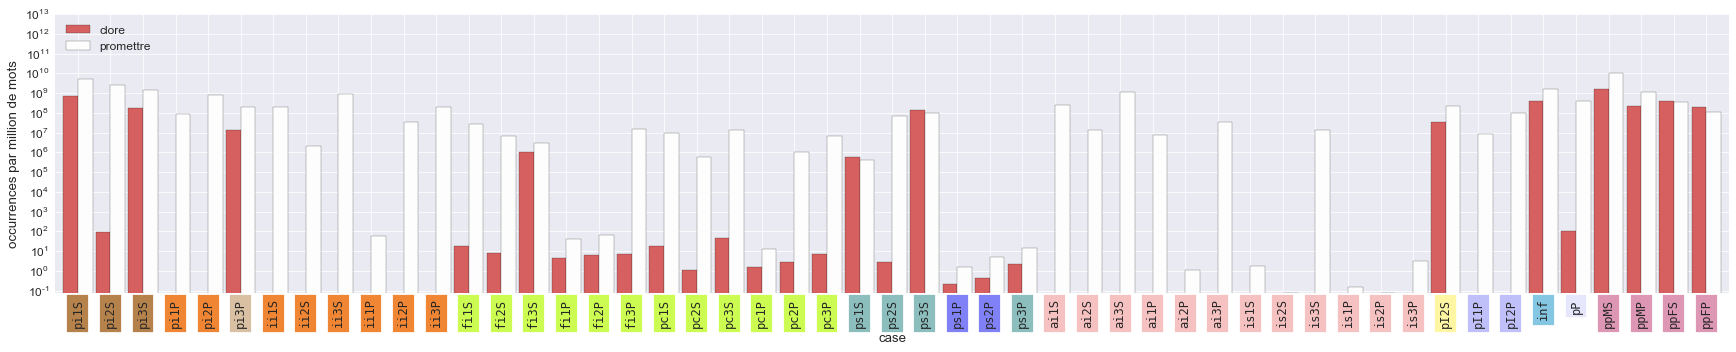

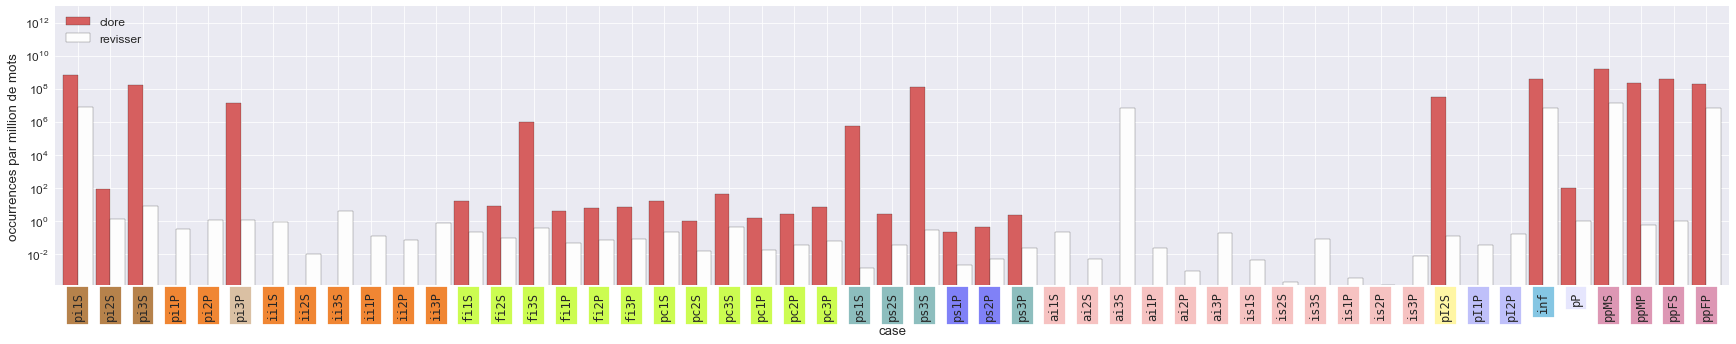

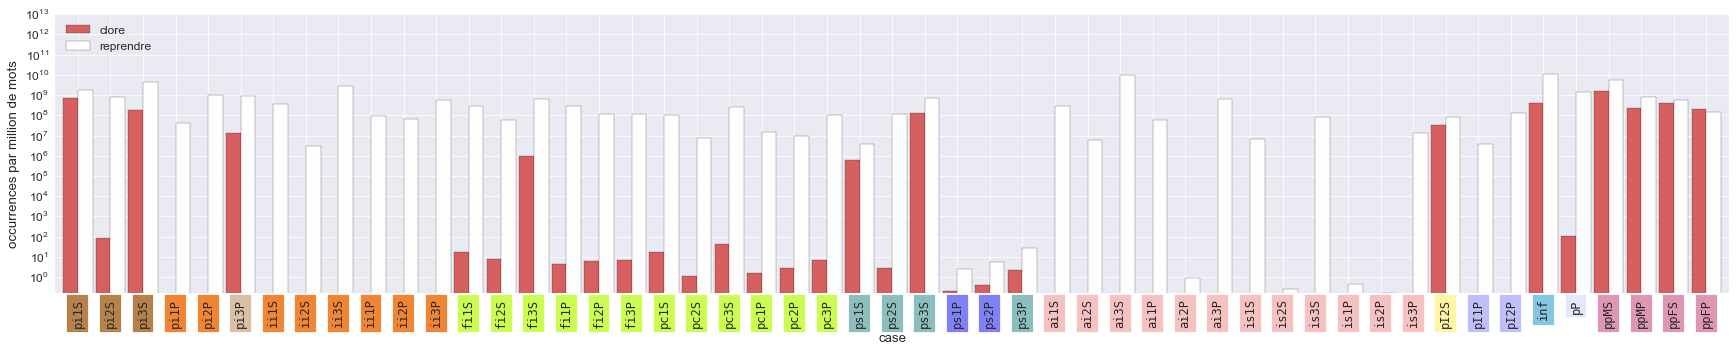

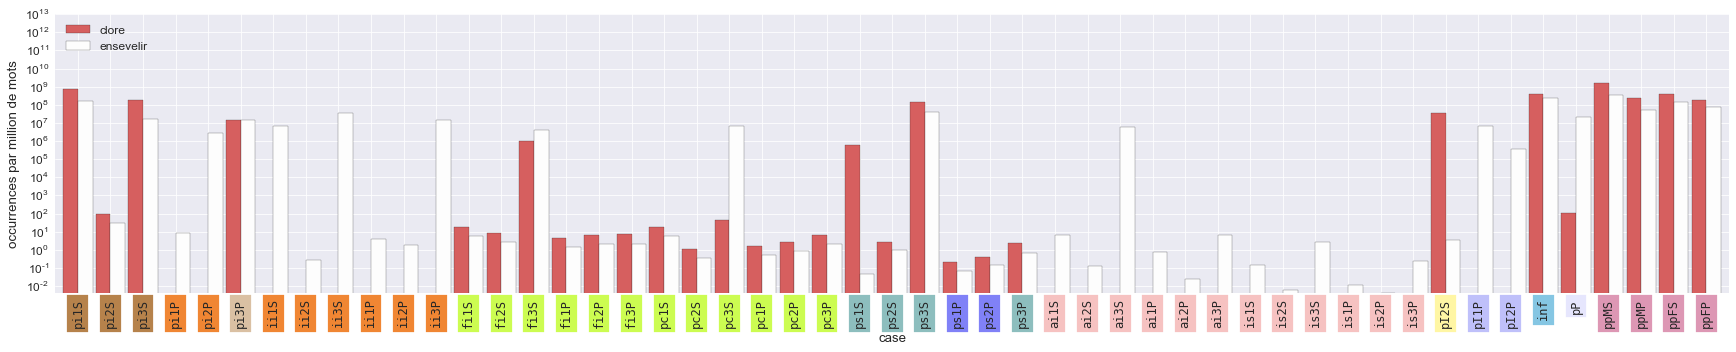

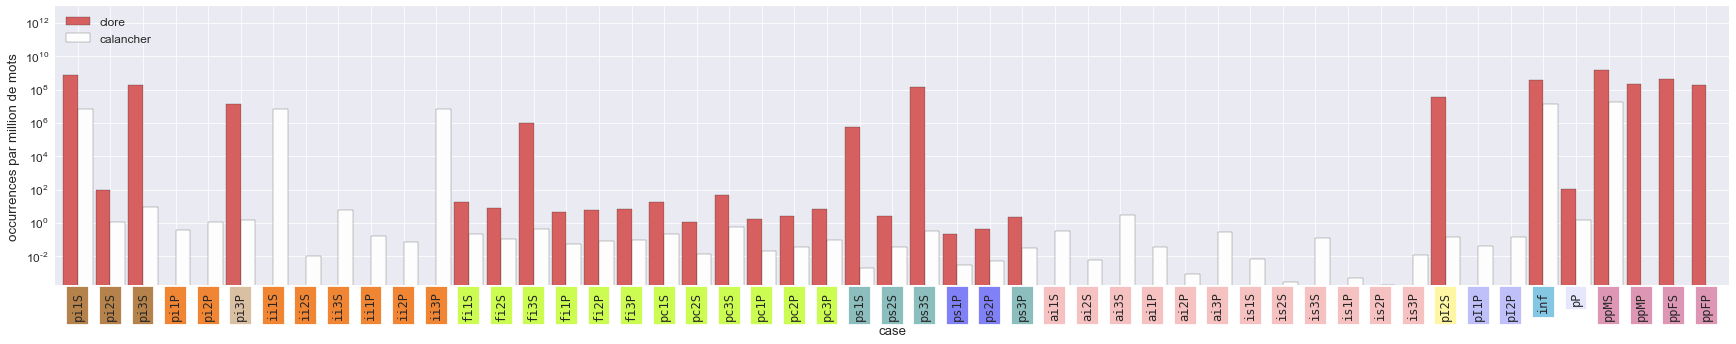

In [34]:
voisins=u"abrutir promettre revisser reprendre ensevelir calancher".split(" ")
for voisin in voisins:
    plotFamille([u"clore",voisin],paradigmeFS,
                width=.9,
                ylim=1.E13,yscale="log",
               )

### DISTRAIRE

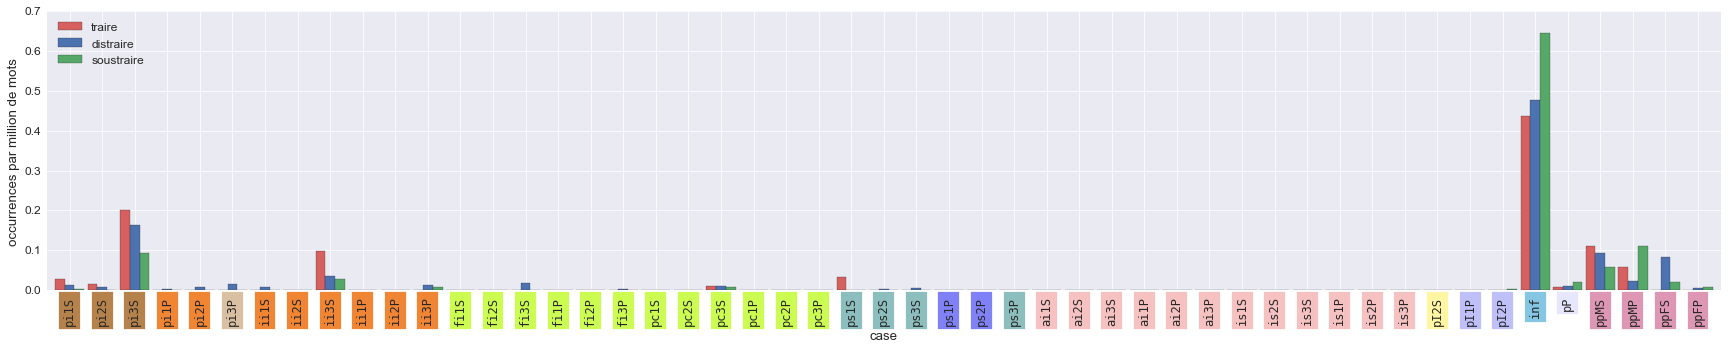

In [75]:
famille=u"traire, distraire, soustraire".split(", ")
plotFamille(famille,paradigmeFSN,width=.9,#yscale="log",
            lPalette="deep"
#            ylim=1.E13,
           )


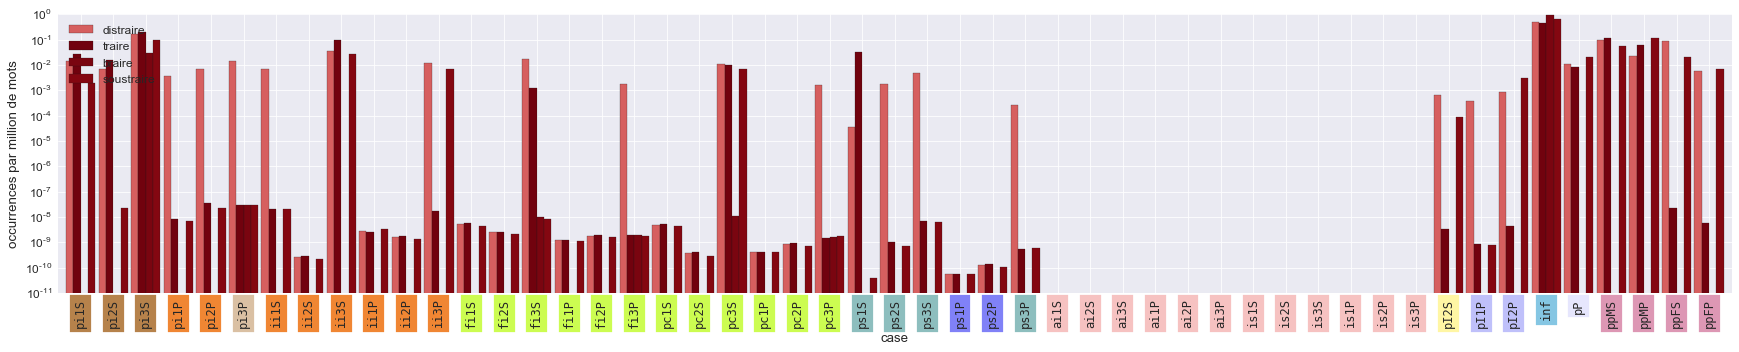

In [72]:
famille=u"distraire, traire, braire, soustraire".split(", ")
plotFamille(famille,paradigmeFSN,width=.9,yscale="log",
            lPalette="Reds_r"
#            ylim=1.E13,
           )


# Clusterisation des distributions de fréquences

## Préparation des données

### Découpage du tableau

In [35]:
def preparerDataRaw(gParadigme):
    paradigme=gParadigme[cases].copy()
    if "lexeme" in paradigme.columns:
        lexemeLabels=paradigme["lexeme"].tolist()
        del paradigme["lexeme"]
    if "freqLexeme" in paradigme.columns:
        del paradigme["freqLexeme"]

    if "case" in paradigme.columns:
        del paradigme["case"]
    paradigme.fillna(value=0,inplace=True)

    data_raw=paradigme.iloc[:].values
    return data_raw

## Normalisation

In [36]:
from sklearn import preprocessing

def normaliserDataRaw(data_raw):
    return preprocessing.normalize(data_raw)

In [37]:
def dendrogramLabels(id):
    return lexemeLabels[id]

In [38]:
def dendrogramClustersLabels(id):
    if id in clustersLabels:
        return ", ".join(clustersLabels[id][:5])
    else:
        return id

## Clusterisation hiérarchique => dendrogramme

In [39]:
import sys
sys.getrecursionlimit()

1000

In [40]:
sys.setrecursionlimit(100000)

### Clusterisation

In [41]:
from scipy.cluster import hierarchy as hc

In [42]:
def getLinkage(gParadigme):
    data_raw=preparerDataRaw(gParadigme)
    data=normaliserDataRaw(data_raw)
    Z=hc.linkage(data,method='ward')
    return Z

### Plotter le dendrogramme sans troncation
Le dendrogramme sans troncation permet d'explorer les voisinages des différents verbes avec les distinctions maximales

In [43]:
def plotDendrogram(Z,parType="",p=None,truncate_mode=None):
    plt.figure(figsize=(2000,600),)
    if truncate_mode:
        leaf_label_func=dendrogramClustersLabels
        figInsert=u"-%s-%d-"%(parType,p)
    else:
        leaf_label_func=dendrogramLabels
        figInsert=u"-%s-"%(parType)

    dendrogram = hc.dendrogram(Z,
                               leaf_label_func=leaf_label_func,
                               leaf_font_size=10.,
                               p=p,truncate_mode=truncate_mode,
                              )
    plt.savefig(repHDR+u'Lex3-Dendrogram%sVerbes.pdf'%figInsert, dpi=300, bbox_inches="tight")

### Récupération des clusters avec troncation
- pour obtenir les clusters, on fait appel à fcluster qui fournit un numéro de cluster pour chaque index de data
    - pour obtenir les noms des verbes, on fait la correspondance entre le numéro obtenu et lexemeLabels
    - pour obtenir les "noms" des clusters, il faut lancer dendrogram une première fois sans plot => R["ivl"]

In [44]:
lexemeLabels=ixVerbes
Z=getLinkage(paradigmeFS)

In [46]:
nbClusters=6000
from scipy.cluster.hierarchy import fcluster
clusters=fcluster(Z, t=nbClusters, criterion='maxclust')
clusters

array([2260, 3315,  130, ..., 3874, 5008, 2389], dtype=int32)

In [47]:
plt.figure(
#    figsize=(1000,20),
    dpi=72)
#%time dendrogram = hc.dendrogram(Z,truncate_mode="lastp",p=50)
R=dendrogram = hc.dendrogram(Z,
                           p=nbClusters,truncate_mode="lastp",
                           no_plot=True
                          )

R["ivl"] #contient les 'noms' des clusters du plot


['2163',
 '4479',
 '3072',
 '880',
 '3979',
 '15',
 '6013',
 '5485',
 '2872',
 '5676',
 '2903',
 '279',
 '5800',
 '178',
 '3584',
 '3991',
 '6483',
 '190',
 '2306',
 '42',
 '288',
 '2433',
 '3892',
 '216',
 '898',
 '5212',
 '3940',
 '6106',
 '4742',
 '1551',
 '1784',
 '3264',
 '1000',
 '5908',
 '1745',
 '1480',
 '444',
 '5906',
 '6397',
 '2036',
 '3492',
 '2590',
 '2024',
 '4576',
 '6535',
 '1618',
 '2448',
 '5392',
 '5795',
 '3221',
 '4590',
 '258',
 '4772',
 '3304',
 '6480',
 '182',
 '2791',
 '5015',
 '4380',
 '2079',
 '3411',
 '6180',
 '970',
 '4397',
 '973',
 '1401',
 '5112',
 '6108',
 '657',
 '4528',
 '240',
 '3989',
 '5456',
 '4235',
 '5512',
 '2390',
 '2705',
 '6432',
 '1062',
 '1427',
 '2013',
 '5684',
 '1350',
 '2629',
 '5993',
 '1906',
 '6101',
 '5657',
 '6243',
 '2901',
 '5753',
 '3608',
 '2567',
 '4940',
 '1839',
 '2121',
 '4096',
 '4505',
 '1786',
 '134',
 '5717',
 '306',
 '3044',
 '1543',
 '3369',
 '5770',
 '1363',
 '2523',
 '5514',
 '3370',
 '4037',
 '4087',
 '3391',
 '3

In [48]:
clustersLabels={}
# for nC,c in enumerate(R["ivl"]):
#     clustersLabels[nC]=[]
for nL,l in enumerate(clusters):
#    print nL,l
    cL=R["ivl"][l-1]
    nomC=u"%d-%s"%(l,cL)
    if nomC not in clustersLabels:
        clustersLabels[nomC]=[]
    clustersLabels[nomC].append(lexemeLabels[nL])
clustersLabels

{u'1410-2522': [u'inventorier'],
 u'3858-4006': [u'gambader'],
 u'2841-1223': [u'ramer'],
 u'3721-2331': [u'\xe9pouser'],
 u'264-2684': [u'entrecouper'],
 u'4892-4084': [u'policer'],
 u'2221-6442': [u'recracher'],
 u'2872-36': [u'tripoter'],
 u'4718-5291': [u'estimer'],
 u'4481-2383': [u'amener'],
 u'3914-6179': [u'resplendir'],
 u'1555-4982': [u'a\xe9rer'],
 u'4113-4243': [u'd\xe9signer'],
 u'2334-6387': [u'remonter'],
 u'3596-1546': [u'fumiger'],
 u'1223-5195': [u'impl\xe9menter'],
 u'929-2596': [u'armer'],
 u'778-4801': [u'cloquer'],
 u'2507-3313': [u'imposer'],
 u'4274-3278': [u'gaminer'],
 u'4107-1452': [u'lisser'],
 u'11-2903': [u'ancrer'],
 u'2473-2443': [u'r\xe9amorcer'],
 u'1912-1651': [u'corroder'],
 u'1620-5618': [u'r\xe9chauffer'],
 u'2774-3988': [u'd\xe9voiler'],
 u'1577-3804': [u'tarder'],
 u'934-114': [u'd\xe9porter'],
 u'4870-4176': [u'envier'],
 u'5017-3185': [u'pantoufler'],
 u'3957-6411': [u'\xe2nonner'],
 u'2225-3646': [u'lancer'],
 u'2381-5828': [u'articuler'],
 u'

In [57]:
for v in boyeDefectifs:
    for c in clustersLabels:
        if v in clustersLabels[c]:
            print v,c
            print clustersLabels[c]
            print

abstraire 2790-2051
[u'abstraire']

accroire 1201-614
[u'accroire', u'adirer', u'aiguayer', u'alambiquer', u'alester', u'apetisser', u'argoter', u'assavoir', u'attraire', u'aveindre', u'bayer', u'bichoter', u'bienvenir', u'bouliner', u'breller', u'bretauder', u'brouir', u'chauvir', u'comparoir', u'courre', u'couturer', u'd\xe9chouer', u'd\xe9f\xe2cher', u'd\xe9murger', u'd\xe9patrier', u'd\xe9soeuvrer', u'embatre', u'ester', u'failler', u'forfaire', u'forpaiser', u'f\xe9rir', u'galantiser', u'mainmettre', u'malfaire', u'maquereller', u'm\xe9faire', u'portraire', u'pouiller', u'pyrrhoniser', u'qu\xe9rir', u'raboutir', u'ragrandir', u'ravoir', u'redonder', u'r\xe9ciproquer', u'r\xe9franger', u'sniffer', u'sorguer', u'sphac\xe9ler', u'superfinir', u'surglacer', u'taponner', u'tartir', u'troussequiner', u'valeter', u'vaser', u'\xe9cher', u'\xe9perdre', u'\xe9poutier']

adirer 1201-614
[u'accroire', u'adirer', u'aiguayer', u'alambiquer', u'alester', u'apetisser', u'argoter', u'assavoir', u'

In [55]:
(clustersLabels[u"3830-404"])

[u'g\xe9sir']

In [ ]:
plotDendrogram(Z,parType=u"Freq",p=nbClusters,truncate_mode="lastp")

In [ ]:
plotDendrogram(Z,parType=u"Freq")

### Plotter les voisins de défectifs

In [21]:
def plotVoisins(voisins,gParadigme,ylim=None):
    for lexeme in voisins:
        dfAX=gParadigme[gParadigme["lexeme"]==lexeme].set_index("lexeme")[cases].T
        ax=dfAX.plot(kind="bar",
                     figsize=(20,5),
                     color=sns.color_palette("hls"),
                    )
        xlabels=ax.get_xticklabels()
        for xlabel in xlabels:
            xtext=xlabel.get_text()
            xlabel.set_backgroundcolor(cellColors[xtext])
        if ylim:
            ax.set_ylim([0,ylim])
        plt.show()

### Voisins de défectifs (fréquence standard FS, fréquence log FL)
- clore
    - FS : revisser,(**clore**,(abrutir,promettre))
    - FL : (**clore**,(corrompre,méconnaître)),((recoudre,réécrire),(mander,étriper))
- distraire
    - FS : ((instruire,(séduire,(**distraire**, extraire))),(régénérer,(construire,détruire)))
    - FL : (((garantir, investir),(enrichir, rafraîchir)),(blâmer, **distraire**))
- abstraire
    - FS : ((**abstraire**, pocher),(distancer, proscrire))
    - FL : ((**abstraire**, parfaire),(peinturlurer,(civiliser, daller)))
- soustraire
    - FL : (brutaliser,débrider),(**soustraire**,étayer)
- extraire
    - FL : (dorloter,désamorcer),(**extraire**,restituer)
- retraire, raire
    - FL : grêler,(**raire**,**retraire**)
- traire
    - FL : (**traire**,**frire**),((**clore**,(corrompre,méconnaître)),((recoudre,réécrire),(mander,étriper))
    
    
Il y a aussi quelques vestiges
- portraire, attraire
    - FS : éclore, crémer, époutier, éperdre, écher, vaser, valeter, troussequiner, tartir, taponner, surglacer, superfinir, sphacéler, sorguer, sniffer, réfranger, réciproquer, redonder, ravoir, ragrandir, raboutir, quérir, pyrrhoniser, pouiller, portraire, méfaire, maquereller, malfaire, mainmettre, galantiser, férir, forpaiser, forfaire, failler, ester, embatre, désoeuvrer, dépatrier, démurger, défâcher, déchouer, couturer, courre, comparoir, chauvir, brouir, bretauder, breller, bouliner, bienvenir, bichoter, bayer, aveindre, attraire, assavoir, argoter, apetisser, alester, alambiquer, aiguayer, accroire, adirer, rassir, occire, reclure, dérayer, rechaper, retordre, regrossir, pionner, coqueter, partouser, hercher, tictaquer, ambler, apponter, jodler, luncher, équeuter, émulsifier, zester, tiller, stripper, soumissionner, signaliser, scolariser, réincarcérer, réargenter, ressemer, resalir, rentamer, rempoter, redémolir, recongeler, reclouer, recarreler, pifer, pastiller, parafer, paginer, inférioriser, hotter, escher, enkyster, enjuiver, encliqueter, embraquer, déventer, désinsectiser, désincruster, désaccoupler, dépoudrer, dénazifier, décriminaliser, déconditionner, décomprimer, dissimiler, diligenter, cureter, coupailler, corréler, contremander, cliver, avitailler, chansonner, quarter, manutentionner, maximiser, exemplifier, trompeter, crosser, maquereauter, syndicaliser, scratcher, rober, rechasser, farter, alcaliniser, alphabétiser, télédiffuser, shampooiner, réabonner, revoter, retuber, reposséder, remprunter, criminaliser, recorder, implémenter, décuver, dépolluer, raller, pleuvioter, varapper, tatillonner, mésuser, lapiner, endêver, dansotter, couchailler, bavocher, bostonner, obvier, rôdailler, égrainer, écornifler, versifier, systématiser, régionaliser, remboîter, reloquer, relaisser, refeuilleter, recogner, reblanchir, rabonnir, pasteuriser, paperasser, maroufler, entrebattre, entr'aimer, engraver, enclouer, encaserner, empanner, désensabler, désenchaîner, désembuer, dépiler, dépaver, démuseler, délustrer, débobiner, correctionnaliser, chabler, cancériser, braser, boyauter, anatomiser, bluter, déconsigner, rapointir, prolétariser, embobeliner, décaisser, désengourdir, mortaiser, vulgariser, décrêper, rebander, désencrasser, rassortir, réséquer, boulanger, réassurer
    - FL : éperdre, écher, vaser, valeter, tartir, sniffer, ravoir, quérir, portraire, galantiser, férir, failler, ester, désœuvrer, démurger, déchouer, couturer, courre, comparoir, chauvir, brouir, bayer, attraire, accroire, assavoir
 

### CLORE

In [22]:
print "voisins de fréquence brute"
plotVoisins(u"abrutir promettre clore revisser reprendre ensevelir calancher".split(" "),paradigmeFS,ylim=1.2E10)

voisins de fréquence brute


NameError: name 'paradigmeFS' is not defined

In [ ]:
print "voisins de fréquence log"
plotVoisins(u"corrompre méconnaître clore mander étriper recoudre réécrire".split(" "),paradigmeFS,ylim=1.6E9)

### DISTRAIRE

In [ ]:
print "voisins de fréquence brute"
plotVoisins(u"instruire séduire distraire extraire régénérer construire détruire".split(" "),paradigmeFS,ylim=2.5E9)

In [ ]:
print "voisins de fréquence log"
plotVoisins(u"garantir investir enrichir rafraîchir blâmer distraire".split(" "),paradigmeFS,ylim=2.5E9)

### ABSTRAIRE

In [ ]:
print "voisins de fréquence brute"
plotVoisins(u"abstraire pocher distancer proscrire".split(" "),paradigmeFS,ylim=10E7)

In [ ]:
print "voisins de fréquence log"
plotVoisins(u"garantir investir enrichir rafraîchir blâmer distraire".split(" "),paradigmeFS,ylim=2.5E9)

### Lister les défectifs de Boyé(2000) dans les différents clusters

In [ ]:
for cl in clustersLabels:
    print "cluster",cl,len(clustersLabels[cl])
    print u"défectifs",", ".join([l for l in clustersLabels[cl] if l in boyeDefectifs])
    print "verbes",", ".join(clustersLabels[cl])
    print
#    print ", ".join(clusters[cl])

## Clusterisation par KMeans

### Choix du nombre de clusters
Calcul du WCSS (within cluster sum of squares)
kmeans.inertia_ est la valeur du wcss du modèle.

In [ ]:
from sklearn.cluster import KMeans
wcss={}
for i in range(1,55):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10)
    kmeans.fit(data)
    wcss[i]=kmeans.inertia_

In [ ]:
dfWCSS=pd.DataFrame.from_dict(wcss,orient="index")
dfWCSS.plot(figsize=(10,5))

In [ ]:
dfWCSS.diff().plot(figsize=(20,5),xticks=(np.arange(0, 50, step=1))
)


### Clusterisation autour de K points
k-means++ est une stratégie d'initialisation qui permet d'éviter une trappe d'optimisation locale

In [ ]:
nbClusters=7
kmeans=KMeans(n_clusters=nbClusters,init="k-means++")
y_kmeans=kmeans.fit_predict(data)

In [ ]:
lexemeType={}
for nY,y in enumerate(y_kmeans):
    lexemeType[lexemeLabels[nY]]=y
specialLexemes=boyeDefectifs#[u"être",u"avoir",u"pouvoir",u"savoir",u"faire"]
for lex in specialLexemes:
    if lex in lexemeType:
        print lex,lexemeType[lex]

In [ ]:
allLexemes=True
typeLexemes = {}
for k, v in lexemeType.iteritems():
    if k in specialLexemes or allLexemes:
        typeLexemes[v] = typeLexemes.get(v, [])
        typeLexemes[v].append(k)

### plotter les distributions correspondant aux K centres

In [ ]:
pdKMeans=pd.DataFrame(kmeans.cluster_centers_,columns=cases).transpose()

In [ ]:
for i in range(nbClusters):
    iSum=float(pdKMeans[i].sum())
#    print iSum
    pdKMeans[i]=pdKMeans[i]/iSum
#    print pdKMeans[i]
    ax=pdKMeans[i].plot(kind="bar",figsize=(10, 3))
    ax.set_ylim([0,1])
    specLexI=[]
    for l in specialLexemes:
        if l in typeLexemes[i]:
            specLexI.append(l)
            if len(specLexI)>=10:
                break
    nPadLex=5-len(specLexI)
    if nPadLex>0:
        specLexI=specLexI+typeLexemes[i][:nPadLex]
    plt.title("Type %d => %d: "%(i,len(typeLexemes[i]))+",".join(specLexI)+u"\n")
    plt.show()

In [ ]:
for element in typeLexemes:
    print element,len(typeLexemes[element]),typeLexemes[element][:10]

In [ ]:
dfTemp=paradigme[cases].T.isnull().sum()
indexFormes1=dfTemp[dfTemp>=45].index.tolist()
for ix in indexFormes1:
    lexeme=paradigme.iloc[ix]["lexeme"]
    print lexeme,lexemeType[lexeme]
    ax=(paradigme[paradigme["lexeme"]==lexeme].set_index("lexeme")[cases].T.iloc[1:]).plot(kind="bar",figsize=(20,5))
    ax.set_ylim([0,1])
    plt.show()

### Comparaison des distributions de formes entre des voisins potentiels de CLORE

In [45]:
(paradigme[paradigme.lexeme.isin(u"clore corrompre méconnaître".split(" "))].set_index("lexeme")[cases].T.iloc[1:]).plot(kind="bar",figsize=(20,5))

NameError: name 'paradigme' is not defined

In [ ]:
(paradigme[paradigme.lexeme.isin(u"clore abrutir promettre".split(" "))].set_index("lexeme")[cases].T.iloc[1:]).plot(kind="bar",figsize=(20,5))